# Introdução
(rascunho): propósito: Este projeto tem um caráter de exercício. Vou focar na parte de Machine Learning e explorar alguns Classificadores da biblioteca sklearn. Para isso, escolhi um dataset pré-tratado da plataforma DataCamp (link do dataset e da biblioteca sklearn).

## Entendendo os dados
Este banco de dados contém transações de cartões de crédito no Oeste dos EUA. Cada linha representa uma transação, e cada coluna uma iformação sobre a transação, incluindo: detalhes sobre o cliente, qual o comerciante e sua categoria, dados geográficos sobre a localidade da transação e se a transação foi fraudulenta ou não.

### Dicionário dos dados
| transdatetrans_time | Data e Horário da transação                         |
|---------------------|-----------------------------------------------------|
| merchant            | Nome do Comerciente                                 |
| category            | Categoria do Comerciente                            |
| amt                 | Valor da Transação                                  |
| city                | Cidade do Titular do Cartão de Crédito              |
| state               | Estado do Titular do Cartão de Crédito              |
| lat                 | Latitude do Local de Compra                         |
| long                | Longitude do Local de Compra                        |
| city_pop            | População da Cidade do titular do cartão de crédito |
| job                 | Trabalho do Titular do Cartão de Crédito            |
| dob                 | Data de Nascimento do Titular do Cartão de Crédito  |
| trans_num           | Número da Transação                                 |
| merch_lat           | Latitude da Localização do Comerciante              |
| merch_long          | Longitude da Localização do Comerciante             |
| is_fraud            | Se a transação foi fraudulenta (1) ou Não (0)       |

## Objetivo
Criar um modelo de aprendizagem de máquina capaz de prever se uma transação será fraudulenta ou não com base nos dados disponibilizados.

## Etapas do projeto
Para atingir este objetivo planejo seguir as seguintes etapas:
- Importação dos dados
- Limpeza dos dados e pré-processamento
- Breve análise exploratória dos dados (não é o foco deste projeto)
- Modelagem dos dados
- Treinar algoritmos Classificadores de aprendizagem de máquina
- Avaliar a performance dos algoritmos
- Utilizar técnicas para conseguir a melhor performance possível

# Instalando e importando as bibliotecas utilizadas

In [1]:
!pip install pandas seaborn --quiet

#ver link que o pakulski enviou sobre como documentar a instalação dos pacotes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando os dados

In [3]:
# Importação dos dados em um pandas "DataFrame" chamado ccf_dataset. "ccf" é um acrônimo para "credit card fraud"
ccf_dataset = pd.read_csv("datasets\credit_card_fraud.csv")

# Exploração inicial dos dados

In [4]:
# Mostra as primeiras 5 linhas dos dados e a quantidade de linhas e colunas
display(ccf_dataset.head())
print(ccf_dataset.shape)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


(339607, 15)


In [5]:
# Mostra informações úteis sobre os dados
display(ccf_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

None

Os dados possuem 339607 linhas (cada uma referente à uma transação) e 15 colunas (referente à uma característica da transação). Não existem "missing values".

Destas 15 colunas, 7 são numéricas e 8 são strings. 

As colunas "trans_date_trans_time" e "dob" referem-se a datas, então, irei converter elas para o tipo "datetime64".

In [6]:
# Convertendo as colunas "trans_date_trans_time" e "dob" para o tipo datetime64
ccf_dataset['trans_date_trans_time'] = pd.to_datetime(ccf_dataset['trans_date_trans_time'])
ccf_dataset['dob'] = pd.to_datetime(ccf_dataset['dob'])

# Breve análise de dados exploratória
Agora vamos ver algumas características sobre os dados:

## Qual a proporção de transações fraudulentas?

C:\Users\marco\AppData\Local\Temp\ipykernel_19460\1488940624.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


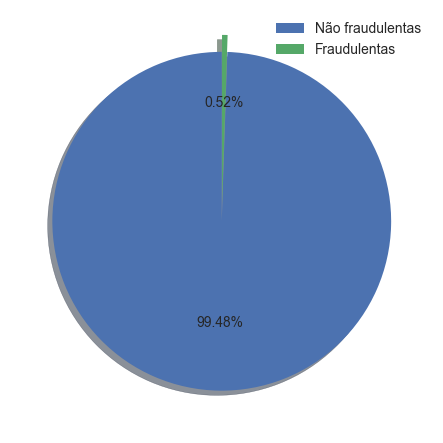

In [7]:
plt.style.use('seaborn')

# Extraindo a contagem de transações fraudulentas e não fraudulentas
is_fraud_count = ccf_dataset['is_fraud'].value_counts()

# Criando rótulos para utilizar no gráfico
labels = 'Não fraudulentas', 'Fraudulentas'

# Gerando um gráfico em pizza que mostra a proporção entre a quantidade de transações fraudulentas e não fraudulentas no DataSet
plt.pie(x=is_fraud_count, autopct='%0.2f%%', startangle=90, explode = (0, 0.1), shadow=True)
plt.legend(labels=labels, fontsize='medium')

plt.show()

Como esperado no caso de transações fraudulentasa, existe um grande desbalancemaneto entre as classes.

Ou seja, existem muito mais transações não fraudulentas (337825 ou 99,48%) do que transações fraudulentas (1782 ou 0.52%).

Levando isso em consideração, utilizarei a métrica Revocação (ou Recall em inglês) para avaliar a performance do classificador em detectar fraude.

## Existe diferença nos valores (coluna 'amt') das transações fraudulentas e não fraudulentas?

### Vou explorar os valores das transações para entendê-los melhor:

In [8]:
# teste t (diferença significativa entre os grupos?)
# o que fazer quando os grupos não são balanceados?


# Mostra estatísticas de posição dos valores das transações para cada grupo
display(ccf_dataset.groupby('is_fraud')['amt'].describe())

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,337825.0,68.217523,156.251647,1.00,9.5700,46.250,82.760,28948.90
1,1782.0,518.065460,389.627409,1.78,214.6775,356.435,884.725,1371.81


Transações fraudulentas possuem um valor máximo de US$1.371,81 e média de US$518,06

Transações não fraudulentas possuem um valor máximo de US$28.948,90 e média de US$68,21

Ambas possuem valores mínimos próximos, entre US$1,00 e US$2,00

### Agora, vou dividr as transações em 3 grupos:
- Baixo valor: US$0,00 até US$50,00
- Médio valor: valores maiores que US$50 e menores ou iguais à US$100,00
- Alto valor: valores maiores que US$100,00

anotações:

criar um grupo com os outliers? o range dos grupos tá adequado? qual seria o range ideal dos grupos, será? pensei em utilizar os quartis para ver...

In [9]:
# Criando os grupos "baixo valor" ("low_amt"), "médio valor" ("medium_amt") e "alto valor" ("high_amt") em um dicionário
dic = {'low_amt': 0, 'medium_amt': 1, 'high_amt': 2}

def categorize_amt(x):
    """
    Recebe um parâmetro inteiro ou decimal e classifica seus valores como 0 se for <= 50, 1 se for <= 100 ou 2 se for > 100
    :param x: recebe um valor inteiro ou decimal
    """
    assert x > 0, "x tem que ser positivo"
    if x <= 50:
        return 0
    elif x <= 100:
        return 1
    else:
        return 2

ccf_dataset['teste'] = ccf_dataset['amt'].map(categorize_amt)
ccf_dataset.groupby(['teste', 'is_fraud'])['amt'].describe()

count        mean         std     min       25%     50%  \
teste is_fraud                                                               
0     0         178214.0   17.737396   15.098804    1.00    5.1800   10.31   
      1            390.0   15.736410    8.850409    1.78    9.1875   14.34   
1     0          98113.0   71.507272   13.642504   50.01   59.7800   70.53   
      1             17.0   56.568235   14.997777   50.24   50.6800   51.07   
2     0          61498.0  209.254602  325.371084  100.01  117.5325  143.12   
      1           1375.0  666.250029  317.048818  101.04  320.7050  763.37   

                     75%       max  
teste is_fraud                      
0     0          30.2900     50.00  
      1          20.0075     49.83  
1     0          81.8200    100.00  
      1          52.1200     98.70  
2     0         199.9375  28948.90  
      1         938.8750   1371.81

### Criando gráfico de barras para ver como as transações se comportam dentro destes grupos:

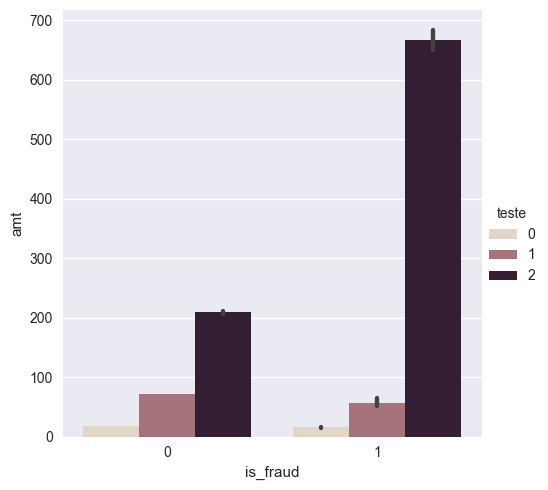

In [10]:
# Gráfico de barras mostrando a média das transações fraudulentas e não fraudulentas em cada grupo
sns.catplot(data=ccf_dataset, x='is_fraud', y='amt', kind='bar', hue='teste', palette='ch:.25')

Isso mostra que, em média, as transações fraudulentas pertencem majoritariamente ao grupo de transações acima de 100 reais!

### Criando boxplot para explorar ainda mais este comportamento

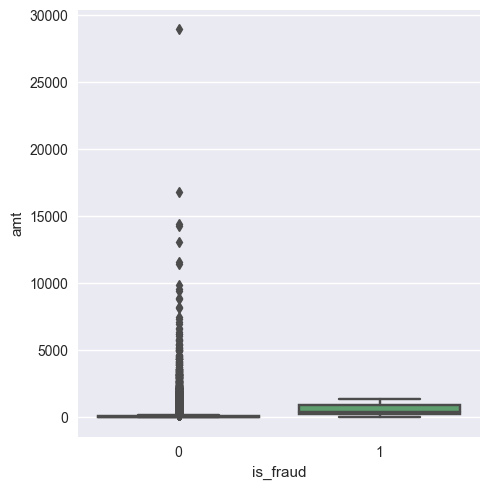

In [11]:
# Fazer um histograma separando os valores por bins

# Faz boxplots dos valores das transações para cada grupo (fraudulentas e não fraudulentas)
sns.catplot(data=ccf_dataset, x='is_fraud', y='amt', kind='box')
plt.show()

OBS: encontrar um jeito de arrumar esse plot para ser mais informativo. 

As transações não-fraudulentas apresentam outliers muito expressivos que atrapalham a visualização. Para nos ajudar, posso excluir alguns outliers.

# Modelagem de dados

In [12]:
#Separando features numéricas de categóricas
num_data = ccf_dataset[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud']]
num_data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud']]

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,107.23,48.8878,-118.2105,149,49.159047,-118.186462,0
1,220.11,42.1808,-112.2620,4154,43.150704,-112.154481,0
2,96.29,41.6125,-122.5258,589,41.657520,-122.230347,0
3,7.77,32.9396,-105.8189,899,32.863258,-106.520205,0
4,6.85,43.0172,-111.0292,471,43.753735,-111.454923,0
...,...,...,...,...,...,...,...
339602,12.68,64.7556,-165.6723,145,65.623593,-165.186033,0
339603,13.02,41.5403,-122.9366,308,41.973127,-123.553032,0
339604,43.77,40.4931,-91.8912,519,39.946837,-91.333331,0
339605,86.88,46.1966,-118.9017,3684,46.658340,-119.715054,0


## A seguir irei:
- Selecionar vários modelos e a métrica que utilizarei para comparar as performances (neste caso, acredito que uma boa ideia seria utilizar o Recall, uma métrica avalia a taxa de falsos negativos).
- Dividir os dados em teste e treino de forma estratificada (quando temos uma prevalência muito maior de uma classe em relação a outra, recomenda-se dividir de forma estratificada)
- Treinar os modelos sem realizar qualquer "hyperparameter tunning"
- Escalar os dados através do StandardScaler (remove a média e escala os dados para que tenham a mesma variância)

In [13]:
# Importando o escalador
from sklearn.preprocessing import StandardScaler

# Importando "model_selection"
from sklearn.model_selection import cross_val_score, KFold, train_test_split

# Importando classificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Importando métricas
from sklearn.metrics import confusion_matrix, classification_report, recall_score

ImportError: DLL load failed while importing _expected_mutual_info_fast: O nome do arquivo ou a extensão é muito grande.

In [ ]:
# Criando uma semente constante para utilizar e garantir reprodutibilidade
SEED = 1

# Instanciando Features
X = num_data.drop('is_fraud', axis=1).values

# Instanciando Target
y = num_data['is_fraud'].values

# Dividindo os dados em 20% teste e 80% treino de forma estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

# Instanciando escalador
scaler = StandardScaler()

# Escalando as Features de treino
X_train_scaled = scaler.fit_transform(X_train)

# Escalando as Features de teste
X_test_scaled = scaler.transform(X_test)

# Instanciando os modelos classificadores
lr = LogisticRegression(random_state=SEED)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=SEED)

# Lista de Tuplas contendo o nome dos modelos e seus respectivos objetos
models = [('LogisticRegression', lr), ('KNN', knn), ('DecisionTree', dt)]

# Loop que irá iterar sobre cada modelo e popular a lista "results" com o seu respectivo resultado de performance
for name, model in models:
    # 
    model.fit(X_train_scaled, y_train)
    # 
    y_pred = model.predict(X_test_scaled)
    # Calculando a revocação
    rec_score = recall_score(y_test, y_pred)
    # 
    print(f'Revocação do modelo {name} é: {rec_score}')
    print(f'Matriz de confusão do modelo {name}:\n{confusion_matrix(y_test, y_pred)}')
    print(f'Relatório de classificação do modelo {name}:\n{classification_report(y_test, y_pred)}')

Revocação do modelo LogisticRegression é: 0.0
Matriz de confusão do modelo LogisticRegression:
[[67539    27]
 [  356     0]]
Relatório de classificação do modelo LogisticRegression:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     67566
           1       0.00      0.00      0.00       356

    accuracy                           0.99     67922
   macro avg       0.50      0.50      0.50     67922
weighted avg       0.99      0.99      0.99     67922

Revocação do modelo KNN é: 0.24157303370786518
Matriz de confusão do modelo KNN:
[[67490    76]
 [  270    86]]
Relatório de classificação do modelo KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67566
           1       0.53      0.24      0.33       356

    accuracy                           0.99     67922
   macro avg       0.76      0.62      0.66     67922
weighted avg       0.99      0.99      0.99     67922

Revocação

## Interpretando os valores de Revocação


Dentre todos os classificadores, a DecisionTree foi a que teve melhor performance em classificar transações como fraudulentas (menor taxa de falsos negativos).

################ Utilizar técnicas de boosting para DecisionTree?????

## Próximos passos:
Utilizar a técnica de "Ensemble Learning": combinar os classificadores em um grupo através de um "voting classifier".

Um "voting classifier" cria um meta-modelo que agrega a previsão de vários modelos em uma previsão final. É útil em casos de classificação binária (como é o caso deste projeto).

In [ ]:
# Importando o "Voting Classifier"
from sklearn.ensemble import VotingClassifier

# Instanciando VotingClassifier
vc = VotingClassifier(estimators=models)
vc.fit(X_train_scaled, y_train)
y_pred_vc = vc.predict(X_test_scaled)
print(f'A Revocação do Voting Classifier é: {recall_score(y_test, y_pred_vc)}')

A Revocação do Voting Classifier é: 0.14325842696629212


## Interpretando acurácia
A acurácia do Voting Classifier foi ligeiramente inferior à acurácia do modelo KNN sozinho